# **Exercises, Dynamic Systems II**
## **Part 1**

Lotka-Volterras predator prey equations are defined as

$$
\begin{cases}
    \frac{dn}{dt} = rn - anp \\
    \frac{dp}{dt} = anp - \mu p
\end{cases}
$$

where
- $n(t)$ is the **prey** population size
- $p(t)$ is the **predator** population size
- $r$ is the intrinsic **growth rate** of the prey
- $a$ is predator **attack rate**
- and $\mu$ is the predator **mortality**.
*Note: one eaten prey generates one new predator in this model. To account for this, the term* $canp$ *would replace* $anp$ *in the predator equation.*

### **Question A**
Write an R script that plots the isoclines of the system with the following format
```r
LV_isoclines <- function(r, a, mu)
```

---

### Notes

The prey isocline is defined as the function in the **phase space** (coordinate system of all state variables) where the derivative of prey is 0.

In other words, it represents all stable prey population sizes. Since we have the function for the derivative of population size already given in the model

$$
f_n (n, p) = rn - anp
$$

in which we input $0$ in the $n$ position in $f_n (n, p)$.

The trivial solution is $n = 0$ because if there is no population it cannot change.

To find the non-trivial solution, we can simplify the above expression by applying $+anp$ and solving for 0, getting

$$
r - ap = 0 \Rightarrow r = ap \Rightarrow p = \frac{r}{a}
$$

---

The predator isocline is defined the same way but for the predator population

$$
f_p (n, p) = anp - \mu p
$$

When inputting $0$ in the $p$ position in $f_p (n, p)$, we get the trivial solution $p = 0$. The non-trivial solution is

$$
an - \mu = 0 \Rightarrow an = \mu \Rightarrow n = \frac{\mu}{a}
$$

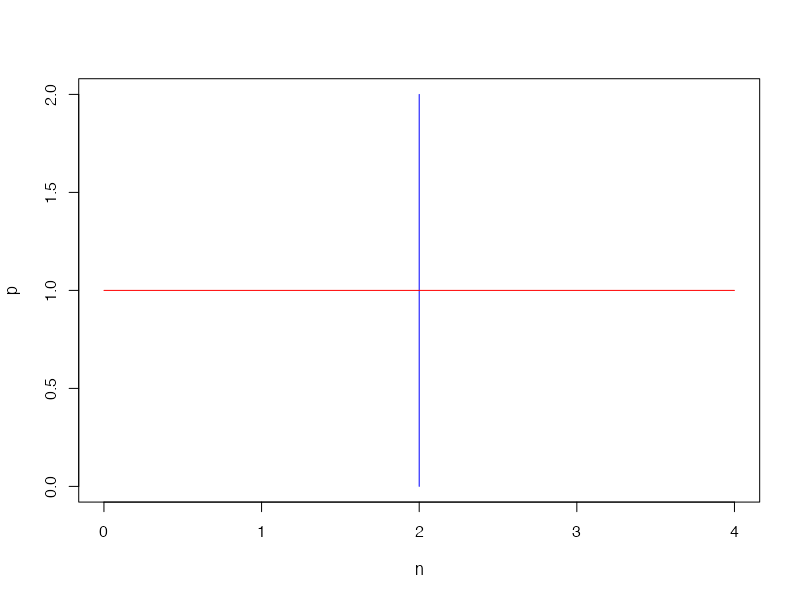

In [ ]:
# Define function
LV_isoclines <- function(r, a, mu) {
  # Set points to plot (remember: n on x axis, p on y axis)
  n_star <- mu/a  # n*
  p_star <- r/a  # p*
  eq <- c(n_star, p_star)  # Equilibrium (n*, p*)

  # Create isocline matrices
  n_iso <- rbind(c(n_star, 0), c(eq[1], eq[2]*2))  # Prey isocline matrix
  p_iso <- rbind(c(0, p_star), c(eq[1]*2, eq[2]))  # Predator isocline matrix

  # Return outputs in list
  return(list(c(n_iso, p_iso)))
}


  # Plot isoclines
  plot(
    n_iso, type = "l", xlim = c(0, 2*n_star), ylim = c(0, 2*p_star), xlab = "n", ylab = "p", col = "blue"
  )  # Prey isocline
  points(p_iso, type = "l", col = "red")  # Predator isocline
}

# Call function
LV_isoclines(1, 1, 2)

### **Question B**

### Part i

Write a script using the `ode` function using two state variables. The system function will now return a vector of **two** derivatives in a list. For example:

```r
LV_sys <- function(t, np, Parameters) {
    # extract vector content:
    n <- np[1]
    p <- np[2]
    # calculate the two growth rates:
    dndt <- (...you fill it in...)
    dpdt <- (...)
    return(list(c(dndt, dpdt))) # the result as a vector in a list
}
```

where, of the input parameters,
- `t` represents time (we will not use this)
- `np` is the vector of state variables (prey density, predator density)
- `Parameters` is a list of parameter values

The output should be a list containing time derivatives of the state variables in vector format.

In [ ]:
# Define function
LV_sys <- function(t, np, Parameters) {
  # Extract vector content
  n <- np[1]
  p <- np[2]

  # Calculate growth rates
  # Prey growth rate
  # Predator growth rate

  # Return results as a vector in a list
  return(list(c(dndt, dpdt)))
}

### Part ii

Write a script that uses `ode` to simulate the system (like question A), like

```r
out <- ode( y = np0, func = LV_sys, times = timevec, parms = P)
```

where
- `out` is a three-column matrix, where the columns are
    1. Time points specified in `timevec`
    2. Prey densities for each time point
    3. Predator densities for each time point
The order of state variables $(n, p)$ must be the same in the initial condition `np0` (a vector).

Ensure that the script does everything:
1. Defines the system function
2. Sets up parameters
3. Runs simulation
4. Plots the result
    - Time plots
    - Phase plane plots
    - Isoclines (calculate using `LV_isoclines`)